# Homework #1: AB-testing<br>and the Multi-Armed Bayesian Bandit

### You have three choices... choose wisely, my friends...


|Option|The "Red" one|The "Blue" one|The "Other" one|
|-|-|-|-|
|Unknown Probability of Success|$\theta_A$ | $\theta_B$ | $\theta_C$ |

$$p(\theta_j|x_j,n_j) \propto \theta^{x_j+\alpha_j-1}(1-\theta_j)^{n-x+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$

- Try one out, and collect that data update...
    - What's the data?
    - What's the update for the posterior in question?
- Which one of the three choices will you try out? How will you choose? 


- Hints: <u>You can use *simulation* to find out the *relative belief* (i.e., probability) that each of the choices is the best.</u> Posterior distributions characterize your beliefs about the parameters $\theta_A, \theta_B$ and $\theta_C$. What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? If you know the chances that A, B, and C are the best choice, how could you balance ***exploration versus exploitation*** when choosing which of the possible options to collect the next data point on next?


**Solution by Mohammad Yassin**

In [1]:
#Import relevant packages
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

The true probabilities of success for each option (A, B, and C) are defined as `pA`, `pB`, and `pC`. In a real-world scenario, these probabilities are unknown and what we aim to estimate. Their true values are `0.3`, `0.45` and `0.7` respectively. We know from this that we will eventually converge on option C.

Because the probabilities of success are unknown, when we first start, the initial parameters for the Beta distributions, `alpha` and `beta`, are set to 1. This represents a uniform prior, indicating no initial preference or information about the likelihood of success for each option.

We initialize the prior distributions for each option (A, B, and C) as Beta distributions with parameters `alpha` and `beta`. The Beta distribution is chosen because it is a conjugate prior for the Bernoulli distribution, making our Bayesian sequential updates straightforward.

These priors represent our initial beliefs about the success probabilities of each option before we observe any trial outcomes.

For each trial, we perform the following steps:

1. Sample a value from the current posterior distributions of each option. The option with the highest sampled value is selected for the trial. This approach balances exploration and exploitation by considering both the estimated success rate and the uncertainty of each option.

2. Run a trial for the chosen option and observe the outcome. The posterior distribution of the selected option is then updated based on this new data.

For the first 10 trials, the chosen option and the sampled probabilities are printed to observe the decision-making process in the initial phase.

Finally, we plot the posterior distributions of each option after all trials. This visualization shows how our beliefs about the success probabilities of the options have evolved. As we gather more data, these distributions become more peaked and narrow, indicating increased confidence in our estimates.

In [2]:
#Parameters

# Seed for reproducibility
np.random.seed(123)

# Initial Beta parameters to turn Beta distribution into Uniform distribution
alpha = 1
beta = 1

# True probabilities for each option
pA = 0.3
pB = 0.45
pC = 0.7

# Priors for each option
prior_A = stats.beta(alpha, beta)
prior_B = stats.beta(alpha, beta)
prior_C = stats.beta(alpha, beta)

# Function to simulate a trial
def run_trial(p):
    return np.random.rand() < p

# Function to update the posterior
def update_posterior(prior, success, alpha, beta):
    alpha_new = alpha + success
    beta_new = beta + 1 - success
    return stats.beta(alpha_new, beta_new)

# Number of trials
N = 100

# Trackers for alpha and beta values for each option
alpha_A, beta_A = [alpha], [beta]
alpha_B, beta_B = [alpha], [beta]
alpha_C, beta_C = [alpha], [beta]

In [3]:
for trial in range(N):
    
    # Sampling from the current posteriors
    sample_A = prior_A.rvs()
    sample_B = prior_B.rvs()
    sample_C = prior_C.rvs()

    # Choose the option with the highest sampled value
    if max(sample_A, sample_B, sample_C) == sample_A:
        choice = 'A'
    elif max(sample_A, sample_B, sample_C) == sample_B:
        choice = 'B'
    else:
        choice = 'C'

    # Print choice for the first 10 trials. 
    #This isnt important for running the trial but good for visualizing when the sampling converges 
    if trial < 10:
        print(f"Trial {trial + 1}: Option {choice} chosen (Sampled probabilities - A: {sample_A:.3f}, B: {sample_B:.3f}, C: {sample_C:.3f})")

    # Run a trial for the chosen option
    if choice == 'A':
        result = run_trial(pA)
        prior_A = update_posterior(prior_A, result, alpha_A[-1], beta_A[-1])
        alpha_A.append(prior_A.args[0])
        beta_A.append(prior_A.args[1])
    elif choice == 'B':
        result = run_trial(pB)
        prior_B = update_posterior(prior_B, result, alpha_B[-1], beta_B[-1])
        alpha_B.append(prior_B.args[0])
        beta_B.append(prior_B.args[1])
    else:
        result = run_trial(pC)
        prior_C = update_posterior(prior_C, result, alpha_C[-1], beta_C[-1])
        alpha_C.append(prior_C.args[0])
        beta_C.append(prior_C.args[1])

Trial 1: Option A chosen (Sampled probabilities - A: 0.709, B: 0.292, C: 0.551)
Trial 2: Option B chosen (Sampled probabilities - A: 0.583, B: 0.802, C: 0.248)
Trial 3: Option C chosen (Sampled probabilities - A: 0.394, B: 0.225, C: 0.613)
Trial 4: Option B chosen (Sampled probabilities - A: 0.261, B: 0.295, C: 0.060)
Trial 5: Option A chosen (Sampled probabilities - A: 0.293, B: 0.123, C: 0.222)
Trial 6: Option C chosen (Sampled probabilities - A: 0.203, B: 0.275, C: 0.924)
Trial 7: Option C chosen (Sampled probabilities - A: 0.213, B: 0.254, C: 0.652)
Trial 8: Option C chosen (Sampled probabilities - A: 0.341, B: 0.319, C: 0.951)
Trial 9: Option C chosen (Sampled probabilities - A: 0.096, B: 0.272, C: 0.883)
Trial 10: Option C chosen (Sampled probabilities - A: 0.685, B: 0.183, C: 0.882)


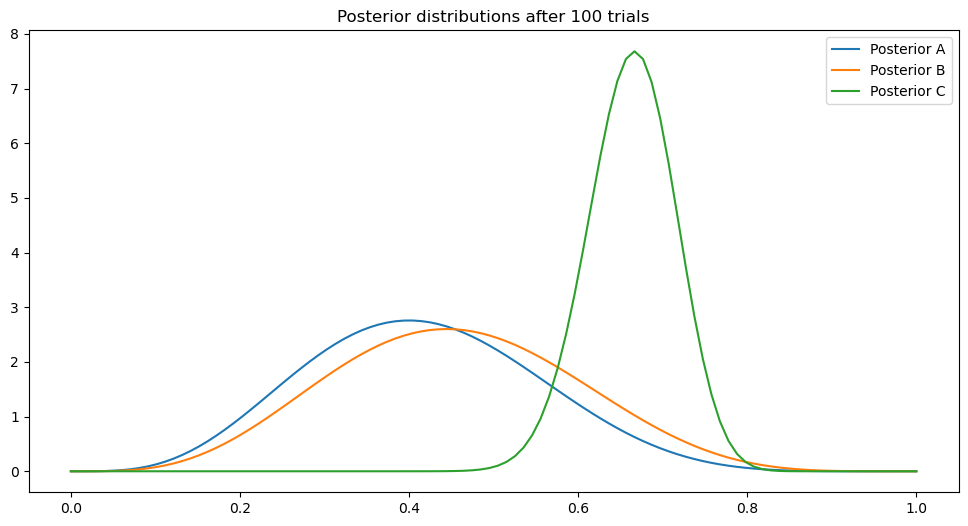

In [4]:
### Plotting the results
plt.figure(figsize=(12, 6))
x = np.linspace(0, 1, 100)
plt.plot(x, prior_A.pdf(x), label='Posterior A')
plt.plot(x, prior_B.pdf(x), label='Posterior B')
plt.plot(x, prior_C.pdf(x), label='Posterior C')
plt.title("Posterior distributions after {} trials".format(N))
plt.legend()
plt.show()